# **Numerical Analysis in Python Exercise**

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# **Use direct inverse method**

In [297]:
# generate x and y
x = np.linspace(0, 1, 101)
y_first = 1 + x + x * np.random.random(len(x))

In [298]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y_first[:, np.newaxis]

In [299]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.58834249]
 [0.97466561]]


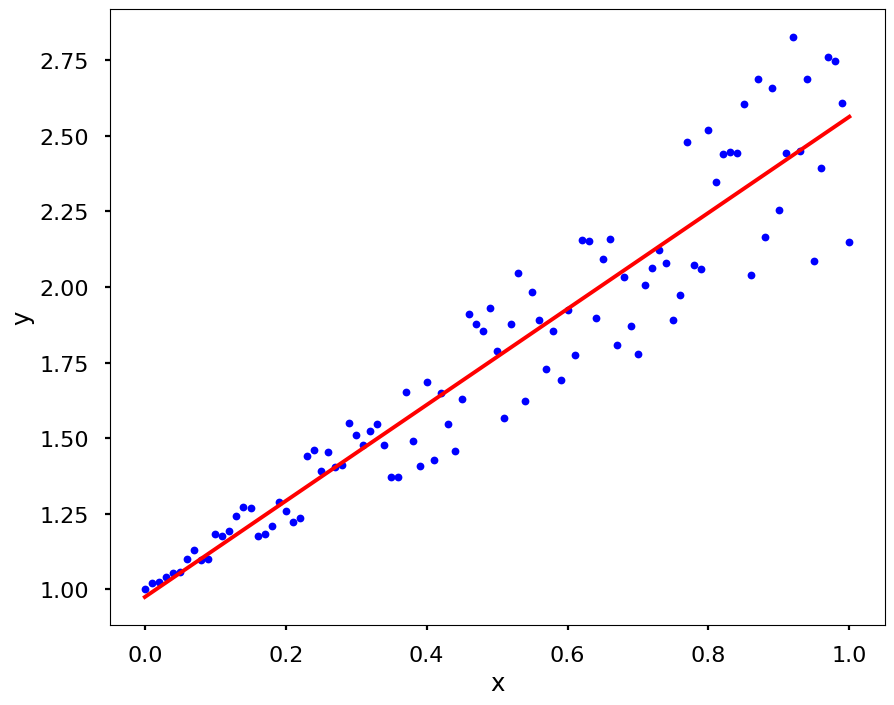

In [300]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Use the pseudoinverse**

In [301]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.58834249]
 [0.97466561]]


# **Use numpy.linalg.lstsq**

In [302]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.58834249]
 [0.97466561]]


# **Calculate the total difference/error in L2-norm**

In [303]:
y_pred = np.dot(A, alpha)

total_error_first = np.linalg.norm(y - y_pred)

print("Total difference/error", total_error_first)


Total difference/error 1.5708627290311683


# **Least Square Regression for Nonlinear Functions**

**Polynomial regression**

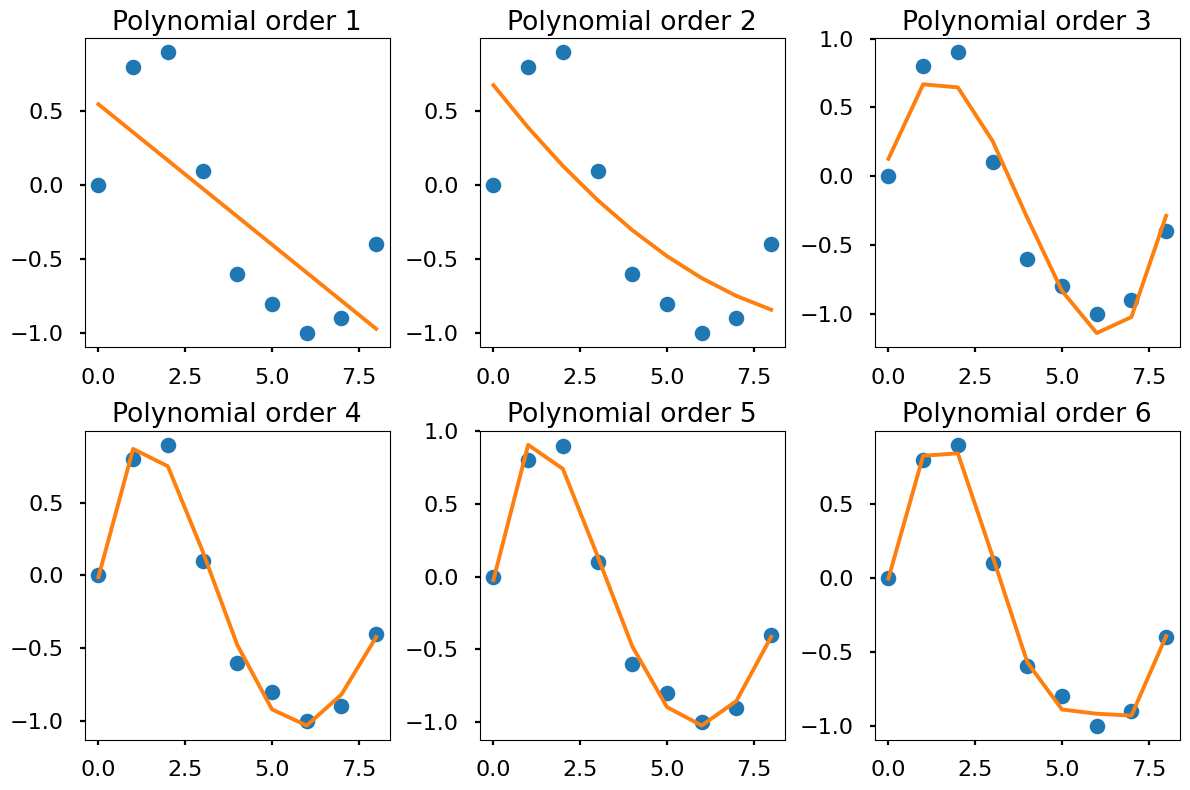

In [304]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):

    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

# **Calculate the total difference/error in L2-norm**

In [305]:
total_errors = []

for i in range(1, 7):
    y_est = np.polyfit(x_d, y_d, i)
    y_pred = np.polyval(y_est, x_d)


    total_error = np.linalg.norm(y_d - y_pred)
    total_errors.append(total_error)

for i, total_error in enumerate(total_errors):
    print(f"Total difference/error for polynomial degree {i+1}: {total_error}")

Total difference/error for polynomial degree 1: 1.3648768768240194
Total difference/error for polynomial degree 2: 1.3430500920604378
Total difference/error for polynomial degree 3: 0.5094418755177322
Total difference/error for polynomial degree 4: 0.2638104614983246
Total difference/error for polynomial degree 5: 0.2557497319801636
Total difference/error for polynomial degree 6: 0.15053388542268478


**Polynomial regression for the noisy number values generated in the first section**

In [306]:
x = np.linspace(0, 1, 101)

In [307]:
y_est_poly = np.polyfit(x, y_first, 1)
y_pred_poly = np.polyval(y_est_poly, x)

In [308]:
total_error_poly = np.linalg.norm(y_first - y_pred_poly)

In [309]:
# compare with the error obtained from linear regression
error_change_percentage = ((total_error_poly - total_error_first) / total_error_first) * 100

print("Total error with polynomial regression:", total_error_poly)
print("Change in error percentage:", error_change_percentage)

Total error with polynomial regression: 1.570862729031168
Change in error percentage: -1.4135201047260038e-14
